# House price prediction problem
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
housetrain=pd.read_csv("D:\\data science QT\\notes\\DataSets\\house price prediction dataset.csv")

In [3]:
housetest=pd.read_csv("D:\\data science QT\\notes\\DataSets\\house price prediction dataset.csv")

In [4]:
housetrain.shape

(1460, 81)

In [5]:
housetrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house_train_num=housetrain.select_dtypes(include=[np.number])

In [7]:
house_train_cat=housetrain.select_dtypes(include=['object']) 

In [8]:
house_train_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
house_train_num_corr=house_train_num.corr()

In [10]:
house_train_num_corr["SalePrice"]

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [11]:
house_train_num_cols = []
house_train_num_cols.extend(house_train_num_corr[(house_train_num_corr["SalePrice"]>0.3) ].index.values)
house_train_num_cols.extend(house_train_num_corr[(house_train_num_corr["SalePrice"]<-0.3) ].index.values)

In [12]:
house_train_num_cols

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [13]:
h_train_num_col_filtered=house_train_num[house_train_num_cols]

In [14]:
h_train_num_col_filtered.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


In [15]:
(house_train_num.isnull().sum().sort_values(ascending=False))

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
LotArea            0
MSSubClass         0
Id                 0
OverallCond        0
OverallQual        0
YearRemodAdd       0
YearBuilt          0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
BsmtFinSF1         0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
1stFlrSF           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [16]:
for hc in ["LotFrontage","GarageYrBlt","MasVnrArea"]:
    print (hc)
    print(house_train_num[hc].mean())
    print(house_train_num[hc].median())
    print ("&&&&&&&&&&&&&&&&&&&&&&&&&&")

LotFrontage
70.04995836802665
69.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
GarageYrBlt
1978.5061638868744
1980.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
MasVnrArea
103.68526170798899
0.0
&&&&&&&&&&&&&&&&&&&&&&&&&&


In [17]:
for col in ["LotFrontage","GarageYrBlt","MasVnrArea"]:
    h_train_num_col_filtered[col].fillna(h_train_num_col_filtered[col].median(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_12436\1583005769.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  h_train_num_col_filtered[col].fillna(h_train_num_col_filtered[col].median(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12436\1583005769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_train_num_col_filtered[col].f

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
house_train_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [21]:
(house_train_cat.isnull().sum().sort_values(ascending=False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageFinish       81
GarageQual         81
GarageType         81
GarageCond         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
Electrical          1
Condition1          0
Condition2          0
LotShape            0
Street              0
MSZoning            0
Neighborhood        0
LandSlope           0
LotConfig           0
Utilities           0
LandContour         0
RoofStyle           0
Heating             0
ExterCond           0
Foundation          0
HouseStyle          0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
BldgType            0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
SaleType            0
SaleCondition       0
dtype: int64

In [22]:
for col in ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]:
    house_train_cat[col].fillna('No Value',inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_12436\3386200746.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_train_cat[col].fillna('No Value',inplace=True)


In [23]:
for col in ["GarageCond","GarageQual","GarageFinish","GarageType","BsmtFinType2","BsmtExposure","BsmtFinType1","BsmtQual","BsmtCond","MasVnrType","Electrical"]:
    house_train_cat[col].fillna(house_train_cat[col].value_counts().idxmax(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_12436\648206534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_train_cat[col].fillna(house_train_cat[col].value_counts().idxmax(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12436\648206534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [24]:
house_train_cat1=house_train_cat.apply(le.fit_transform)

In [25]:
house_train_cat1.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,1,4,4,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,1,4,4,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,1,4,4,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,2,4,4,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,1,4,4,2,3,4,1,8,4


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
Linreg=LinearRegression()

In [28]:

housetraindf1=pd.concat([h_train_num_col_filtered,house_train_cat1],axis=1)

In [29]:
X1=housetraindf1.drop(["SalePrice"],axis=1)

In [30]:
y=housetraindf1["SalePrice"]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3)

In [33]:
house_test_num=housetest.select_dtypes(include=[np.number])
house_test_cat=housetest.select_dtypes(include=['object'])

In [34]:
house_train_num_cols.remove('SalePrice')

In [35]:
h_test_num_col_filtered=house_test_num[house_train_num_cols]

In [36]:
(h_test_num_col_filtered.isnull().sum().sort_values(ascending=False))

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
OverallQual       0
YearRemodAdd      0
YearBuilt         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
BsmtFinSF1        0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
dtype: int64

In [37]:
for hc in ["LotFrontage","GarageYrBlt","MasVnrArea","TotalBsmtSF","GarageArea","GarageCars","BsmtFinSF1"]:
    print (hc)
    print(h_test_num_col_filtered[hc].mean())
    print(h_test_num_col_filtered[hc].median())
    print ("&&&&&&&&&&&&&&&&&&&&&&&&&&")

LotFrontage
70.04995836802665
69.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
GarageYrBlt
1978.5061638868744
1980.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
MasVnrArea
103.68526170798899
0.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
TotalBsmtSF
1057.4294520547944
991.5
&&&&&&&&&&&&&&&&&&&&&&&&&&
GarageArea
472.9801369863014
480.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
GarageCars
1.7671232876712328
2.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
BsmtFinSF1
443.6397260273973
383.5
&&&&&&&&&&&&&&&&&&&&&&&&&&


In [38]:
for col in ["LotFrontage","GarageYrBlt","MasVnrArea","TotalBsmtSF","GarageArea","GarageCars","BsmtFinSF1"]:
    h_test_num_col_filtered[col].fillna(h_test_num_col_filtered[col].median(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_12436\496194425.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  h_test_num_col_filtered[col].fillna(h_test_num_col_filtered[col].median(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12436\496194425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_test_num_col_filtered[col].fillna

In [39]:
(house_test_cat.isnull().sum().sort_values(ascending=False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageFinish       81
GarageQual         81
GarageType         81
GarageCond         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
Electrical          1
Condition1          0
Condition2          0
LotShape            0
Street              0
MSZoning            0
Neighborhood        0
LandSlope           0
LotConfig           0
Utilities           0
LandContour         0
RoofStyle           0
Heating             0
ExterCond           0
Foundation          0
HouseStyle          0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
BldgType            0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
SaleType            0
SaleCondition       0
dtype: int64

In [40]:
for col in ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]:
    house_test_cat[col].fillna('No Value',inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_12436\1358826207.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_test_cat[col].fillna('No Value',inplace=True)


In [41]:
for col in ["GarageCond","GarageQual","GarageFinish","GarageType","BsmtQual","BsmtCond","BsmtFinType2","BsmtExposure","BsmtFinType1","MasVnrType","MSZoning","Utilities","Functional","KitchenQual","SaleType","Exterior2nd","Exterior1st"]:
    house_test_cat[col].fillna(house_test_cat[col].value_counts().idxmax(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_12436\2456100216.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_test_cat[col].fillna(house_test_cat[col].value_counts().idxmax(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12436\2456100216.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [42]:
(house_test_cat.isnull().sum().sort_values(ascending=False))

Electrical       1
Street           0
MSZoning         0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Alley            0
Condition2       0
BldgType         0
RoofStyle        0
HouseStyle       0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
RoofMatl         0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
ExterQual        0
Heating          0
HeatingQC        0
CentralAir       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [43]:
house_test_cat1=house_test_cat.apply(le.fit_transform)

In [44]:
housetestdf1=pd.concat([h_test_num_col_filtered,house_test_cat1],axis=1)

In [45]:
housetestdf1.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,...,1,1,4,4,2,3,4,1,8,4
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,...,1,1,4,4,2,3,4,1,8,4
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,...,1,1,4,4,2,3,4,1,8,4
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,...,5,2,4,4,2,3,4,1,8,0
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,...,1,1,4,4,2,3,4,1,8,4


In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
DecTree=DecisionTreeRegressor()

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
RandFor=RandomForestRegressor(n_estimators=5000)

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
GBM=GradientBoostingRegressor(n_estimators=3000)

In [52]:
LM=Linreg.fit(X_train,y_train)

In [53]:
LM.score(X_train,y_train)

0.835665988867155

In [54]:
dt_M=DecTree.fit(X_train,y_train)

In [55]:
dt_M.score(X_train,y_train)

0.9999956418131405

In [56]:
rf_M=RandFor.fit(X_train,y_train)

In [57]:
rf_M.score(X_train,y_train)

0.9792462200485353

In [58]:
gb_M=GBM.fit(X_train,y_train)

In [59]:
gb_M.score(X_train,y_train)

0.9999865759192167

In [60]:
from sklearn.metrics import accuracy_score, r2_score

In [61]:
gb_y_pred = gb_M.predict(X_test)
rf_y_pred = rf_M.predict(X_test)
lm_y_pred = LM.predict(X_test)

In [62]:
r2_score(y_test,gb_y_pred)

0.8682492643530304

In [63]:
r2_score(y_test,rf_y_pred)

0.8492769426344227

In [64]:
r2_score(y_test,lm_y_pred)

0.8349860530678906

In [65]:
y_eval=gb_M.predict(housetestdf1)

In [66]:
DecTree_0=DecisionTreeRegressor()
RandFor_0=RandomForestRegressor(n_estimators=5000)

In [67]:
pd.DataFrame(y_eval).to_csv('gbm.csv')

In [68]:
from sklearn.model_selection import KFold

In [69]:
test_scores={}
train_scores={}
for k in range (2,3,2):
    kf = KFold(n_splits=k)
    sum_train = 0
    sum_test = 0
    data = housetraindf1
    for train, test in kf.split(data):
        #train_data = np.array(data)[train]
        #test_data = np.array(data)[test]
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["SalePrice"],axis=1)
        y_train = train_data["SalePrice"]
        x_test = test_data.drop(["SalePrice"],axis=1)
        y_test = test_data["SalePrice"]
        RandFor_0_model = RandFor_0.fit(x_train,y_train)
        sum_train += RandFor_0_model.score(x_train,y_train)
        y_pred = RandFor_0_model.predict(x_test)
        sum_test += r2_score(y_test,y_pred)
    average_test = sum_test/k
    average_train = sum_train/k
    test_scores[k] = average_test
    train_scores[k] = average_train

In [70]:
test_scores

{2: 0.8515749402641015}

In [71]:
train_scores

{2: 0.977328176079405}

In [72]:
test_scores={}
train_scores={}
for k in range (2,7,2):
    kf = KFold(n_splits=k)
    sum_train = 0
    sum_test = 0
    data = housetraindf1
    for train, test in kf.split(data):
        #train_data = np.array(data)[train]
        #test_data = np.array(data)[test]
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["SalePrice"],axis=1)
        y_train = train_data["SalePrice"]
        x_test = test_data.drop(["SalePrice"],axis=1)
        y_test = test_data["SalePrice"]
        RandFor_0_model = RandFor_0.fit(x_train,y_train)
        sum_train += RandFor_0_model.score(x_train,y_train)
        y_pred = RandFor_0_model.predict(x_test)
        sum_test += r2_score(y_test,y_pred)
    average_test = sum_test/k
    average_train = sum_train/k
    test_scores[k] = average_test
    train_scores[k] = average_train

In [73]:
test_scores

{2: 0.8518715609202384, 4: 0.8631867346651931, 6: 0.8617583042651837}

In [74]:
train_scores

{2: 0.9771076741282123, 4: 0.9804409435091319, 6: 0.9810338623719854}

In [75]:
def train_test_evaluate_with_kFold(train_data,kmax,algo):
  test_scores={}
  train_scores={}
  for k in range (2,kmax,2):
    kf = KFold(n_splits=k)
    sum_train = 0
    sum_test = 0
    #data = housetraindf1
    data = train_data
    for train, test in kf.split(data):
        #train_data = np.array(data)[train]
        #test_data = np.array(data)[test]
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["SalePrice"],axis=1)
        y_train = train_data["SalePrice"]
        x_test = test_data.drop(["SalePrice"],axis=1)
        y_test = test_data["SalePrice"]
        algo_model = algo.fit(x_train,y_train)
        sum_train += algo_model.score(x_train,y_train)
        y_pred = algo_model.predict(x_test)
        sum_test += r2_score(y_test,y_pred)
    average_test = sum_test/k
    average_train = sum_train/k
    test_scores[k] = average_test
    train_scores[k] = average_train
    print("kvalue: ",k)
  return (train_scores,test_scores)

In [76]:
print(train_test_evaluate_with_kFold(housetraindf1,11,RandFor_0))d

kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
({2: 0.9773308851300737, 4: 0.9777463314521568, 6: 0.9805070072461977, 8: 0.982016095109276, 10: 0.98108036319758}, {2: 0.8522852609017257, 4: 0.82828378653365, 6: 0.8585550069641269, 8: 0.8690808122854636, 10: 0.8541741750871298})


In [77]:
DecTree_0=DecisionTreeRegressor()
GBM_0=GradientBoostingRegressor(n_estimators=3000)
LinReg_0=LinearRegression()

In [78]:
algo_dict = {"LinReg":LinReg_0,"DecTree":DecTree_0,"GBM":GBM_0,"RF":RandFor_0}
algo_train_scores={}
algo_test_scores={}

In [79]:
max_kfold = 10
for algo_name in algo_dict.keys():
    print(algo_name)
    train_score, test_score = train_test_evaluate_with_kFold(housetraindf1,max_kfold+1,algo_dict[algo_name])
    algo_train_scores[algo_name]=train_score
    algo_test_scores[algo_name]=test_score
    
print(algo_train_scores)
print(algo_test_scores)

LinReg
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
DecTree
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
GBM
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
RF
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
{'LinReg': {2: 0.8515540094077994, 4: 0.8798932125681732, 6: 0.8892519089009384, 8: 0.9196498044274024, 10: 0.9231709111339651}, 'DecTree': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'GBM': {2: 0.9999996532619156, 4: 0.9999999944087113, 6: 0.9999999995081273, 8: 0.9999999999655694, 10: 0.9999999999940872}, 'RF': {2: 0.9770726792057984, 4: 0.9776358819644587, 6: 0.9804710539414835, 8: 0.9820587011634921, 10: 0.9811651722516267}}
{'LinReg': {2: 0.7994932582046664, 4: 0.8289435506558211, 6: 0.603066573198638, 8: 0.870275871003709, 10: 0.8624788910661628}, 'DecTree': {2: 0.7356819089537043, 4: 0.7365137692637527, 6: 0.7183398428298923, 8: 0.7205871329578888, 10: 0.7333696949349731}, 'GBM': {2: 0.8602174180446518, 4: 0.8210417776109461, 6: 0.8622872

In [80]:
from matplotlib import style

In [81]:
algo_train_scores["GBM"].values()

dict_values([0.9999996532619156, 0.9999999944087113, 0.9999999995081273, 0.9999999999655694, 0.9999999999940872])

In [82]:
list(algo_train_scores["GBM"].values())

[0.9999996532619156,
 0.9999999944087113,
 0.9999999995081273,
 0.9999999999655694,
 0.9999999999940872]

In [83]:
test_scores_df=pd.DataFrame(algo_test_scores)
train_scores_df=pd.DataFrame(algo_train_scores)

<Axes: >

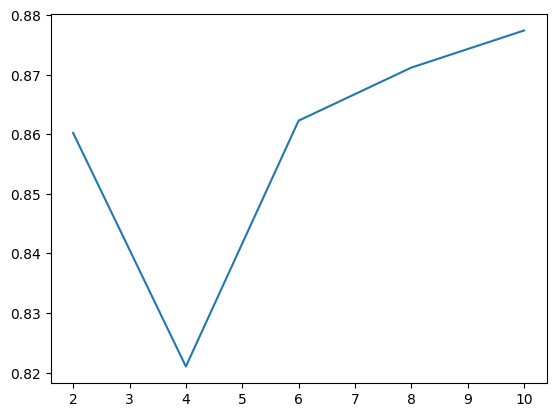

In [84]:
test_scores_df["GBM"].plot()

<Axes: >

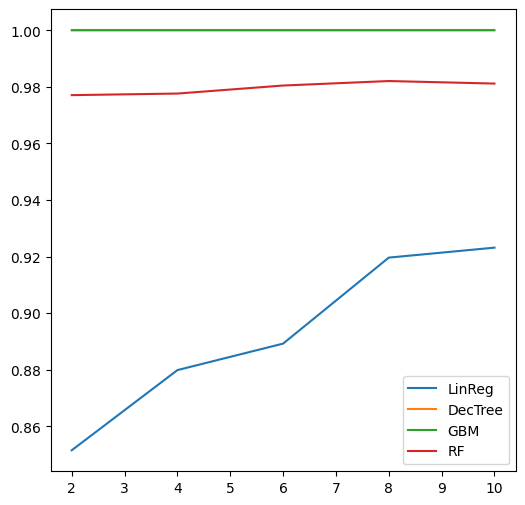

In [85]:
train_scores_df.plot(figsize=(6,6))

<Axes: >

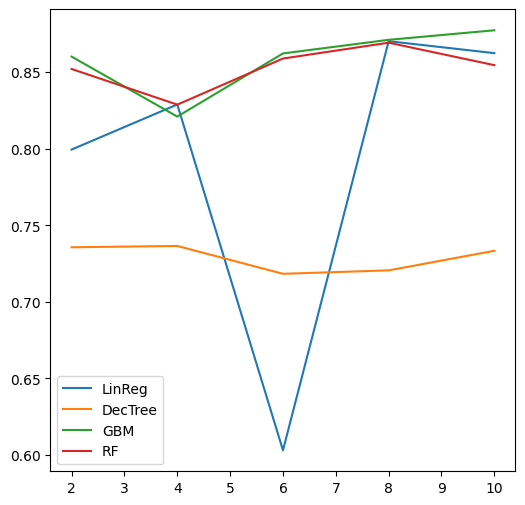

In [86]:
test_scores_df.plot(figsize=(6,6))

In [87]:
DecTree_1=DecisionTreeRegressor()
GBM_1=GradientBoostingRegressor(n_estimators=3000)
LinReg_1=LinearRegression()
RandFor_1=RandomForestRegressor(n_estimators=5000)

In [88]:
algo_dict_1 = {"LinReg":LinReg_1,"DecTree":DecTree_1,"GBM":GBM_1,"RF":RandFor_1}
algo_train_scores_1={}
algo_test_scores_1={}

In [89]:
max_kfold = 10
for algo_name in algo_dict_1.keys():
    print(algo_name)
    train_score, test_score = train_test_evaluate_with_kFold(housetraindf1,max_kfold+1,algo_dict_1[algo_name])
    algo_train_scores_1[algo_name]=train_score
    algo_test_scores_1[algo_name]=test_score
    
print(algo_train_scores_1)
print(algo_test_scores_1)

LinReg
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
DecTree
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
GBM
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
RF
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
{'LinReg': {2: 0.8515540094077994, 4: 0.8798932125681732, 6: 0.8892519089009384, 8: 0.9196498044274024, 10: 0.9231709111339651}, 'DecTree': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'GBM': {2: 0.9999996532619156, 4: 0.9999999944087113, 6: 0.9999999995081273, 8: 0.9999999999655694, 10: 0.9999999999940872}, 'RF': {2: 0.9771265768495588, 4: 0.9776555047393651, 6: 0.9805742655341078, 8: 0.9820290561368892, 10: 0.9811620088786668}}
{'LinReg': {2: 0.7994932582046664, 4: 0.8289435506558211, 6: 0.603066573198638, 8: 0.870275871003709, 10: 0.8624788910661628}, 'DecTree': {2: 0.7089349155179678, 4: 0.6828133196036836, 6: 0.7175321216098762, 8: 0.7041661032014312, 10: 0.7256390838553167}, 'GBM': {2: 0.8554513681561937, 4: 0.809922474682734, 6: 0.86194716

In [90]:
test_scores_df_1=pd.DataFrame(algo_test_scores_1)
train_scores_df_1=pd.DataFrame(algo_train_scores_1)

<Axes: >

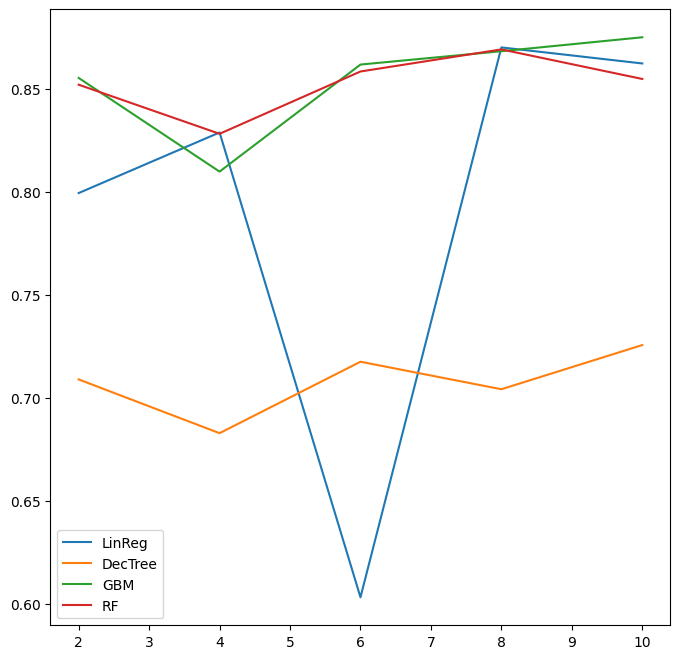

In [91]:
test_scores_df_1.plot(figsize=(8,8))

<Axes: title={'center': 'Train Scores'}>

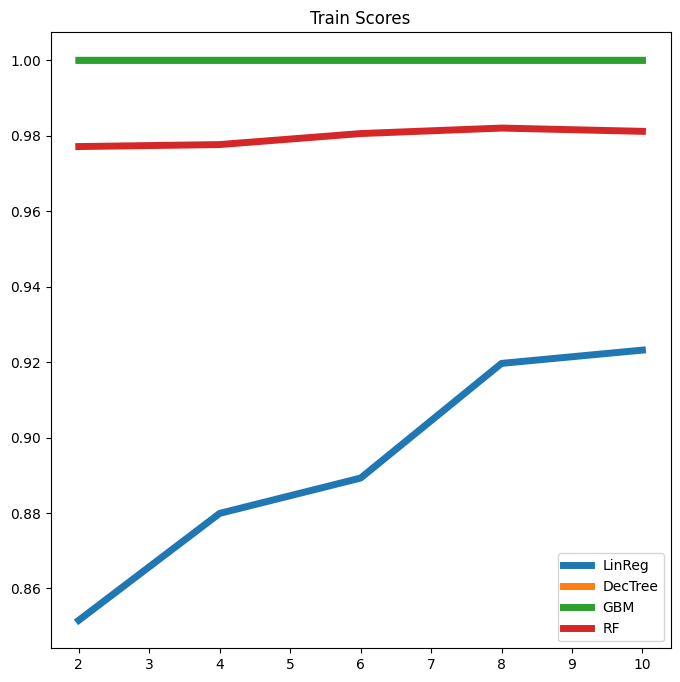

In [92]:
train_scores_df_1.plot(lw=5,figsize=(8,8),title="Train Scores")

<Axes: title={'center': 'Test Scores'}>

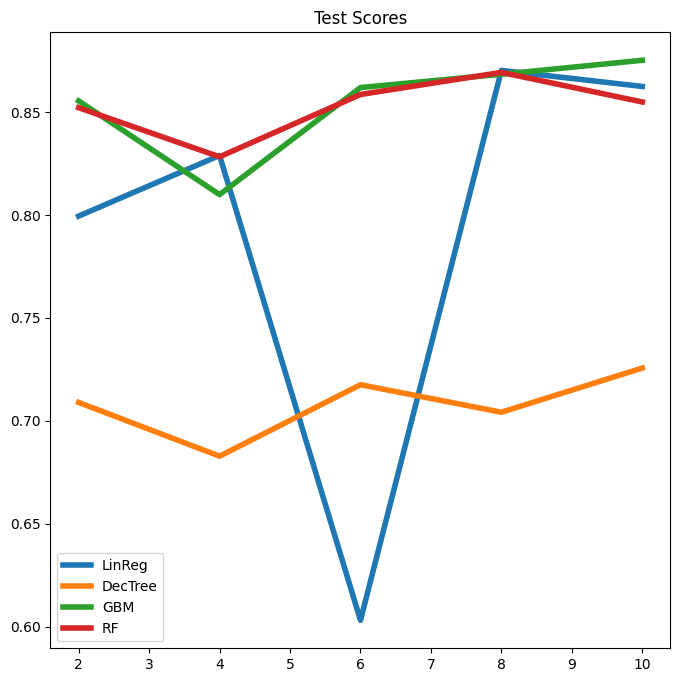

In [93]:
test_scores_df_1.plot(figsize=(8,8),lw=4,title="Test Scores")

In [94]:
train_scores_df_1

,LinReg,DecTree,GBM,RF
2,0.851554,1.0,1.0,0.977127
4,0.879893,1.0,1.0,0.977656
6,0.889252,1.0,1.0,0.980574
8,0.919650,1.0,1.0,0.982029
10,0.923171,1.0,1.0,0.981162


In [95]:
test_scores_df_1

,LinReg,DecTree,GBM,RF
2,0.799493,0.708935,0.855451,0.852159
4,0.828944,0.682813,0.809922,0.828300
6,0.603067,0.717532,0.861947,0.858578
8,0.870276,0.704166,0.868429,0.869312
10,0.862479,0.725639,0.875204,0.854945
